<a href="https://colab.research.google.com/github/aliakbarbadri/nlp-tf/blob/master/week2/week2-examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import io
from google.colab import files
import matplotlib.pyplot as plt


# Lesson 1

In [0]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [0]:
train_data, test_data = imdb['train'], imdb['test']


In [0]:
train_sents = []
train_labels = []
test_sents = []
test_labels = []

for s,l in train_data:
  train_sents.append(str(s.numpy()))
  train_labels.append(l.numpy())

for s,l in test_data:
  test_sents.append(str(s.numpy()))
  test_labels.append(l.numpy())

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [15]:
train_labels[0],train_sents[0]

(0,
 'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."')

In [16]:
train_labels[3],train_sents[3]

(1,
 "b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'")

In [0]:
vocab_size = 10000
max_len = 120
trunc_type = "post"
oov_token = "<OOV>"
embedding_dim = 16

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sents)
train_word_index = tokenizer.word_index
train_seqs = tokenizer.texts_to_sequences(train_sents)
train_padded = pad_sequences(train_seqs,maxlen=max_len, truncating=trunc_type)

test_seqs = tokenizer.texts_to_sequences(test_sents)
test_padded = pad_sequences(test_seqs,maxlen=max_len)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4911 - accuracy: 0.7470 - val_loss: 0.3575 - val_accuracy: 0.8450
Epoch 2/10
782/782 [==============================] - 7s 8ms/step - loss: 0.2436 - accuracy: 0.9055 - val_loss: 0.3713 - val_accuracy: 0.8365
Epoch 3/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0963 - accuracy: 0.9747 - val_loss: 0.4602 - val_accuracy: 0.8222
Epoch 4/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0258 - accuracy: 0.9964 - val_loss: 0.5320 - val_accuracy: 0.8234
Epoch 5/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0083 - accuracy: 0.9992 - val_loss: 0.5950 - val_accuracy: 0.8214
Epoch 6/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0026 - accuracy: 0.9999 - val_loss: 0.6498 - val_accuracy: 0.8230
Epoch 7/10
782/782 [==============================] - 7s 8ms/step - loss: 9.9636e-04 - accuracy: 1.0000 - val_loss: 0.6949 - val_accuracy: 0.8249
Ep

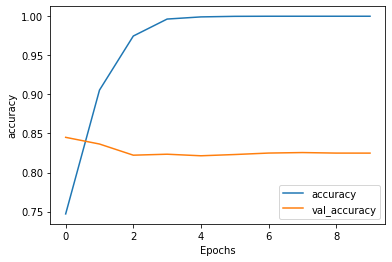

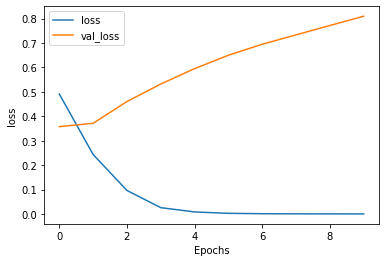

In [20]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
weights = model.layers[0].get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [22]:
reverse_word_index = dict([(value, key) for (key, value) in train_word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(train_padded[1])
print(decode_review(train_padded[1]))
print(train_sents[1])

[   0    0    0    0    0    0    0  256   28   78  585    6  815 2383
  317  109   19   12    7  643  696    6    4 2249    5  183  599   68
 1483  114 2289    3 4005   22    2    1    3  263   43 4754    4  173
  190   22   12 4126   11 1604 2383   87    2   20   14 1945    2  115
  950   14 1838 1367  563    3  365  183  477    6  602   19   17   61
 1845    5   51   14 4090   98   42  138   11  983   11  200   28 1059
  171    5    2   20   19   11  298    2 2182    5   10    3  285   43
  477    6  602    5   94  203    1  206  102  148 4450   16  228  336
   11 2510  392   12   20   32   31   47]
? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what w

In [0]:
vectors_file = io.open('vectors.tsv', 'w', encoding='utf-8')
words_file = io.open('words.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  words_file.write(word + "\n")
  vectors_file.write('\t'.join([str(x) for x in embeddings]) + "\n")
vectors_file.close()
words_file.close()

In [24]:
sentence = ["I really think this is amazing. honest."]
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)
padded = pad_sequences(sequence, maxlen=max_len, truncating=trunc_type)
print(padded)
print(model.predict(padded))
print(model.predict_classes(padded))

[[11, 68, 105, 12, 7, 491, 1216]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   11   68  105   12    7  491 1216]]
[[0.97639674]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


[[1]]


In [0]:
# files.download("vectors.tsv")
# files.download("words.tsv")

# Lesson 2 is the same as lesson 1, but on the sarcasm dataset, so I skipped it.

# Lesson 3 

In [26]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder
print(tokenizer.subwords[:40])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_']


In [0]:
train_seqs = []
train_labels = []
test_seqs = []
test_labels = []

for s,l in train_data:
  train_seqs.append(s.numpy())
  train_labels.append(l.numpy())

for s,l in test_data:
  test_seqs.append(s.numpy())
  test_labels.append(l.numpy())

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [0]:
vocab_size = 10000
max_len = 1000
trunc_type = "post"
oov_token = "<OOV>"
embedding_dim = 64

In [0]:
train_padded = pad_sequences(train_seqs,maxlen=max_len, truncating=trunc_type)

test_padded = pad_sequences(test_seqs,maxlen=max_len)

In [30]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [32]:
# history = model.fit(train_data, epochs=10, validation_data=test_data)
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
782/782 [==============================] - 14s 19ms/step - loss: 0.6351 - accuracy: 0.6656 - val_loss: 0.5100 - val_accuracy: 0.7854
Epoch 2/10
782/782 [==============================] - 14s 18ms/step - loss: 0.3841 - accuracy: 0.8608 - val_loss: 0.3493 - val_accuracy: 0.8636
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2814 - accuracy: 0.8966 - val_loss: 0.3152 - val_accuracy: 0.8740
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2362 - accuracy: 0.9134 - val_loss: 0.3078 - val_accuracy: 0.8777
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2089 - accuracy: 0.9220 - val_loss: 0.3029 - val_accuracy: 0.8793
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1888 - accuracy: 0.9314 - val_loss: 0.3346 - val_accuracy: 0.8684
Epoch 7/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1718 - accuracy: 0.9383 - val_loss: 0.3546 - val_accuracy:

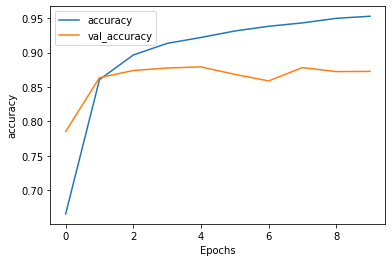

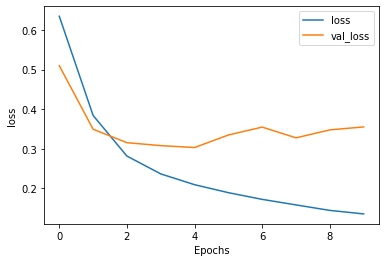

In [33]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
sentence = "I really think this is amazing. honest."
sequence = [tokenizer.encode(sentence)]
print(sequence)
padded = pad_sequences(sequence, maxlen=max_len, truncating=trunc_type)
print(model.predict(padded))
print(model.predict_classes(padded))

[[12, 81, 129, 14, 9, 2266, 3, 3275, 7975]]
[[0.7603581]]
[[1]]


In [35]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)


In [0]:
# files.download('vecs.tsv')
# files.download('meta.tsv')